# Repetitive Scenario Analysis

## 0 Setup

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ema_workbench import (Scenario, Policy, MultiprocessingEvaluator, perform_experiments, ema_logging)
from ema_workbench import Samplers
from ema_workbench import save_results, load_results
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

# Model
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

## 1 Repeating Scenario

To find the appropriate number of scenario that sufficiently covers the uncertainty space

### Run simulation

In [8]:
2**15

32768

In [10]:
######## Problem Formulation
pf = 6
n_scenario = 2**14 # 16384
n_policy = 1

######## Initialize Model
model, steps = get_model_for_problem_formulation(pf)
uncertainties = model.uncertainties
levers = model.levers

######## Reference Policy (No Levers)
ref_policy = [Policy('policy 1', **{'0_RfR 0':0,
                                    '1_RfR 0':0,
                                    '2_RfR 0':0,
                                    '3_RfR 0':0,
                                    '4_RfR 0':0,
                                    '0_RfR 1':0,
                                    '1_RfR 1':0,
                                    '2_RfR 1':0,
                                    '3_RfR 1':0,
                                    '4_RfR 1':0,
                                    'A.1_DikeIncrease 0':0,
                                    'A.2_DikeIncrease 0':0,
                                    'A.3_DikeIncrease 0':0,
                                    'A.4_DikeIncrease 0':0,
                                    'A.5_DikeIncrease 0':0,
                                    'A.1_DikeIncrease 1':0,
                                    'A.2_DikeIncrease 1':0,
                                    'A.3_DikeIncrease 1':0,
                                    'A.4_DikeIncrease 1':0,
                                    'A.5_DikeIncrease 1':0,
                                    'EWS_DaysToThreat':0})
                                ]

######## Run Model
ema_logging.log_to_stderr(ema_logging.INFO)
with MultiprocessingEvaluator(model, n_processes=6) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenario, policies=ref_policy, uncertainty_sampling=Samplers.LHS)

suffix = 2
save_results(results, 'results/data/GSA_PF{}_S{}_P{}_{}.tar.gz'.format(pf, n_scenario, n_policy, suffix))

[MainProcess/INFO] pool started with 6 workers
[MainProcess/INFO] performing 16384 scenarios * 1 policies * 1 model(s) = 16384 experiments
100%|████████████████████████████████████| 16384/16384 [06:00<00:00, 45.45it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to d:\GitHub\epa141a-flood-policy-optimization-overijssel\final assignment\results\data\GSA_PF6_S16384_P1_2.tar.gz


### Load two run results

In [ ]:
# Load Results
pf = 6, n_scenario = 2**14, n_policy = 1
suffix = 1
results_1 = load_results('results/data/GSA_PF{}_S{}_P{}_{}.tar.gz'.format(pf, n_scenario, n_policy, suffix))
results_2 = load_results('results/data/GSA_PF{}_S{}_P{}_{}.tar.gz'.format(pf, n_scenario, n_policy, suffix))
suffix = 2
experiments_1, outcomes_1 = results_1
experiments_2, outcomes_2 = results_2

[MainProcess/INFO] results loaded successfully from d:\GitHub\epa141a-flood-policy-optimization-overijssel\final assignment\results\data\GSA_PF6_S16384_P1_1.tar.gz
[MainProcess/INFO] results loaded successfully from d:\GitHub\epa141a-flood-policy-optimization-overijssel\final assignment\results\data\GSA_PF6_S16384_P1_2.tar.gz


## 2 Compare data from two runs

### Compare distribution of key outcomes

* Plot histograms or kernel density estimates (KDEs) of important outcomes (e.g., Expected Annual Damage, Number of Deaths) for both runs.
* If the distributions overlap closely, the sample size is likely sufficient.

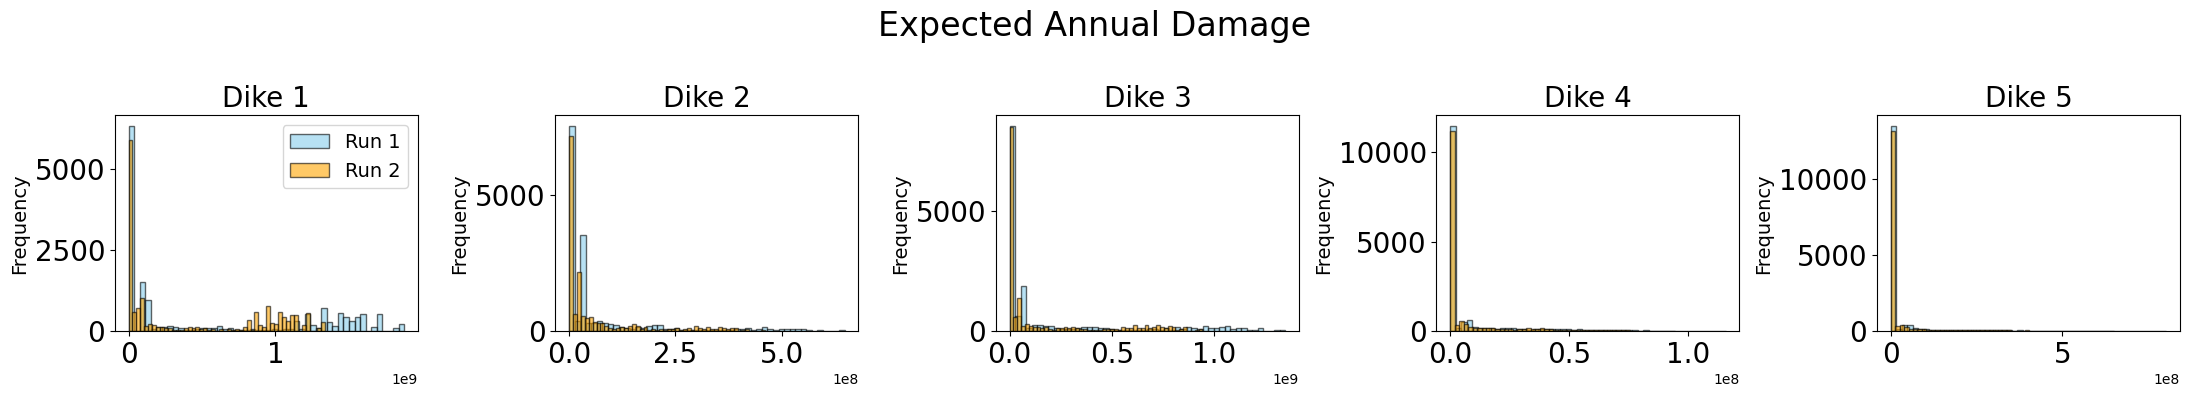

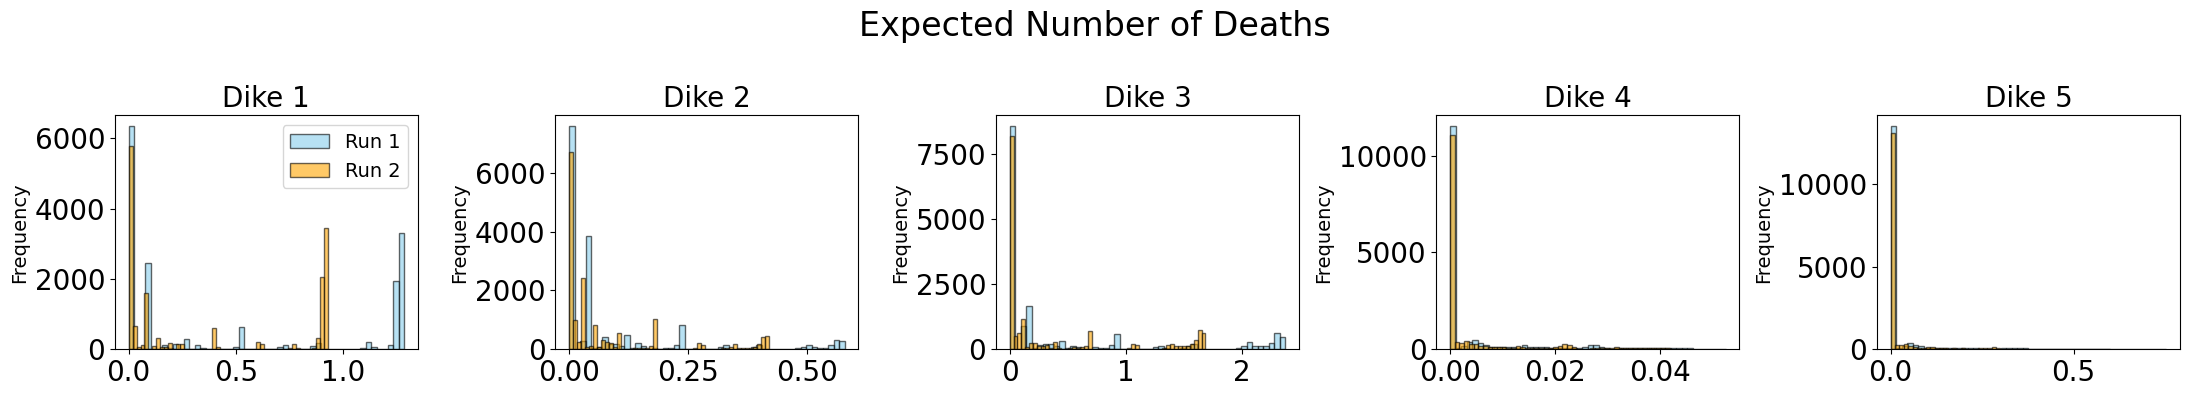

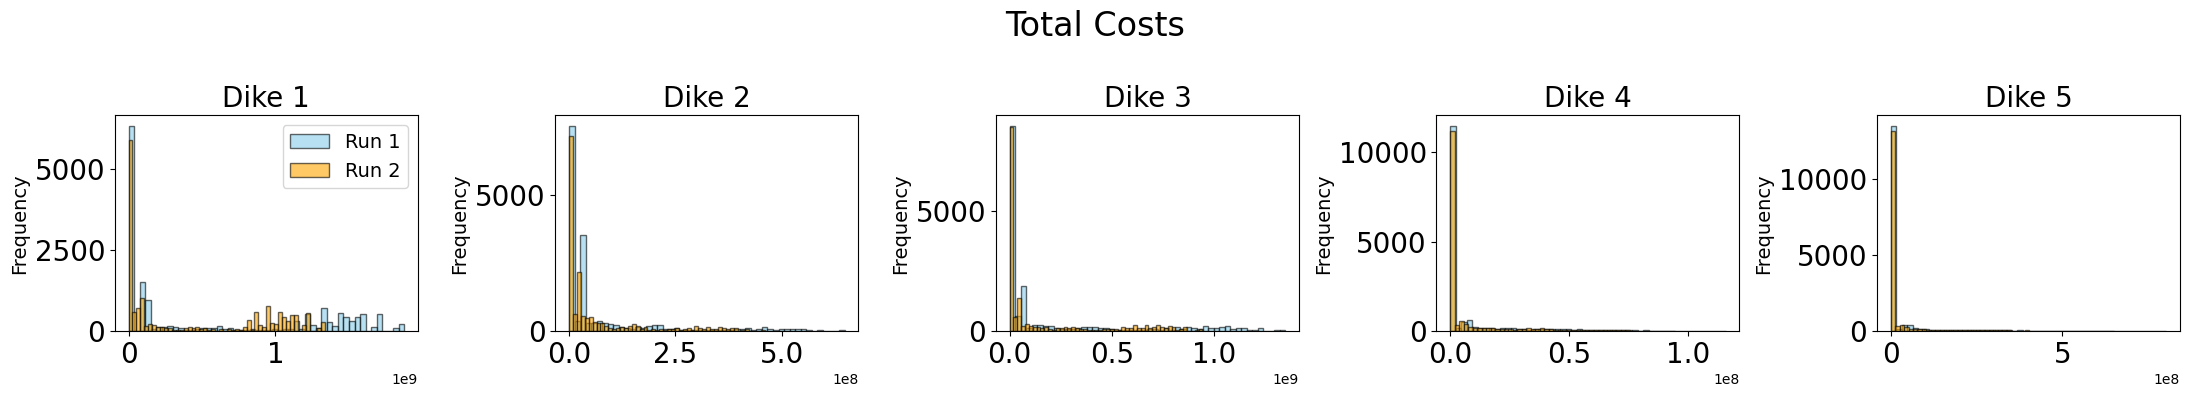

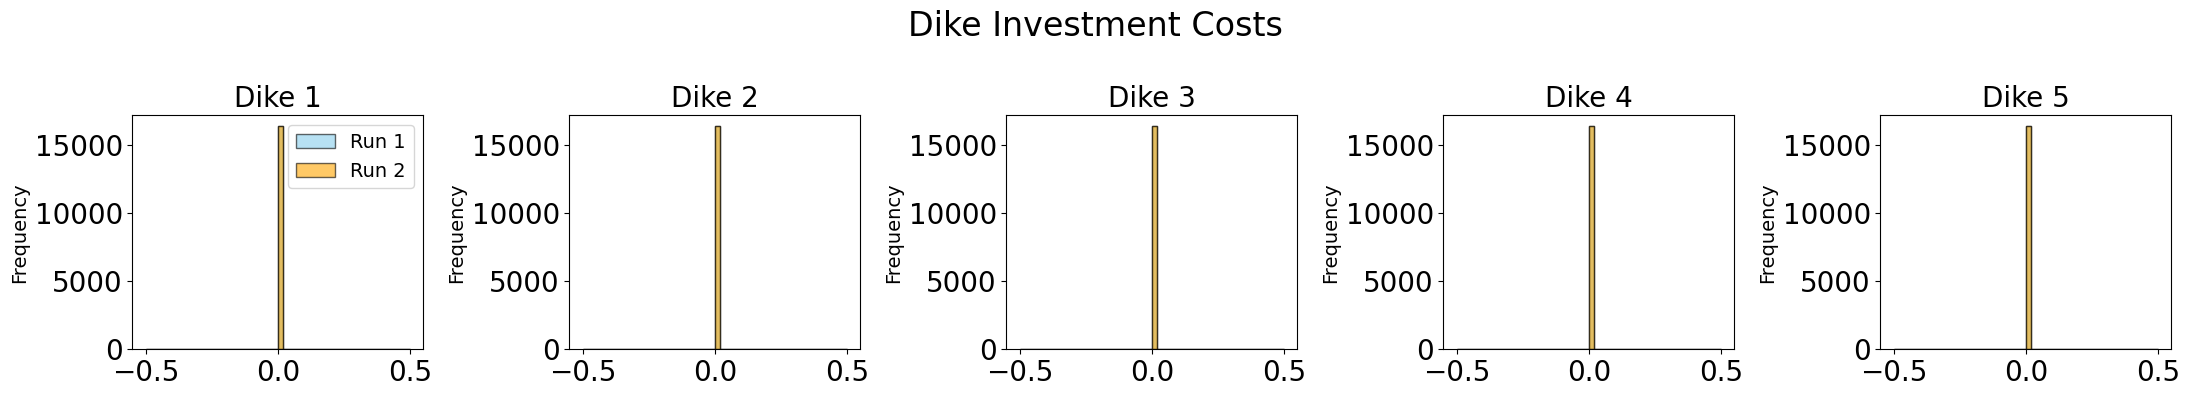

In [12]:
disaggregated_outcome_names = ["Expected Annual Damage", "Expected Number of Deaths", "Total Costs", "Dike Investment Costs"]

# Plot histograms for each disaggregated outcome for all dikes, comparing two runs
for outcome_name in disaggregated_outcome_names:
    fig, axes = plt.subplots(1, 5, figsize=(22, 4))
    for i, dike_no in enumerate(range(1, 6)):
        key = f"A.{dike_no}_{outcome_name}"
        axes[i].hist(outcomes_1[key], bins=50, color='skyblue', edgecolor='black', alpha=0.6, label='Run 1')
        axes[i].hist(outcomes_2[key], bins=50, color='orange', edgecolor='black', alpha=0.6, label='Run 2')
        axes[i].set_title(f"Dike {dike_no}", fontsize=20)
        axes[i].set_ylabel("Frequency", fontsize=14)
        axes[i].tick_params(axis='both', which='major', labelsize=20)
        if i == 0:
            axes[i].legend(fontsize=14)
    fig.suptitle(f"{outcome_name}", fontsize=24)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### Compare summary statistics

* Compute and compare means, medians, standard deviations, and percentiles (e.g., 5th, 50th, 95th) for each outcome.
* Small differences between runs indicate stability.